In [559]:
import matplotlib.pyplot as plt
import numpy as np

- M represents the number of devices contending for random access in the channel.
- N represents the total number of available RAOs in the random access channel.


In [560]:

def generate_poisson(average, size):
    poisson_values = np.random.poisson(average, size)
    sorted_values = np.sort(poisson_values)
    return sorted_values




In [561]:
def NSi(k, n):
    # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    # Calculate the NSi values for each pair of k and n
    results = k * np.exp(-k / n)

    return results

def NCi(k, n):
     # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    results = n - k*np.exp(-k/n) - n*np.exp(-k/n)
    return results

def k_array(k0, N, i):
    k = np.array(np.zeros(i))
    k[0] = k0
    for j in range(0, i-1):
        k[j+1] = k[j]*(1-np.exp(-k[j]/N))
    return k

def successP(i_max, M, NSi):
    p = np.array(np.zeros(i_max))
    p[0] = 0
    for i in range(1, i_max-1):
        p[i] = NSi[i]  
    #print(p)
    return p.sum()/M

def successP2(k,n):
    NSi3 = NSi(k, n)
    return NSi3.sum()/k.max()
    
        


### RAO Equation

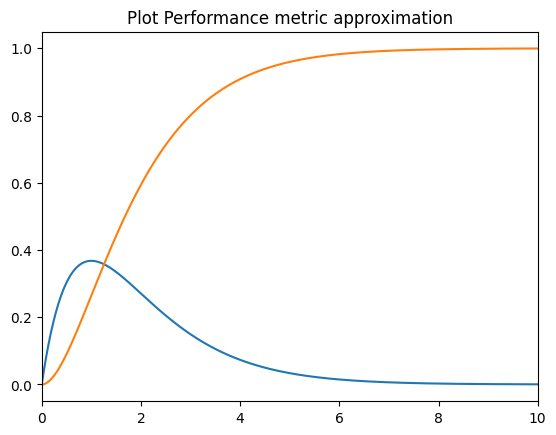

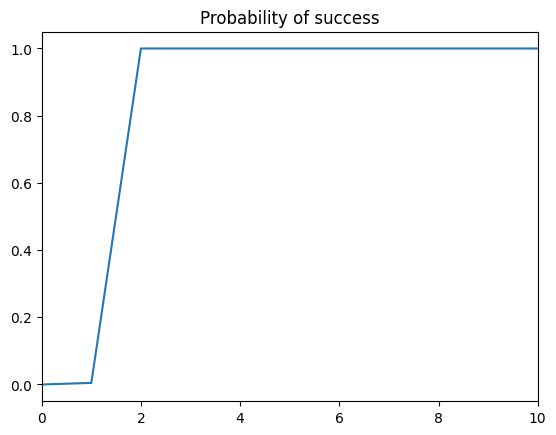

In [564]:

# NCi= N - K*np.exp(-K/N) - N1*np.exp(-K/N)

plt.title('Plot Performance metric approximation')

for N in [3]:
    i = N*1000
    k0 = N*10
    K = np.linspace(0, k0, i)
    #print(K)
    NSi1 = NSi(K, N)  # Compute NS1 inside the loop
    #print(NSi1)
    NCi1 = NCi(K, N)  # Compute NS1 inside the loop
    plt.plot(K/N, NSi1/N, label=f'Equation 4')
    plt.plot(K/N, NCi1/N, label=f'Equation 5')
    plt.xlim(0, 10)


    
### Plot the success probability
plt.show()
i_max = 100
k0 = 10
input_list = list(range(45))

plist = np.zeros(len(input_list))
for i in input_list:
    if i != 0:
        K = k_array(k0, i, i_max)
        NSi3 = NSi(K, i)  # Compute NS1 inside the loop
        Psuccess = NSi3.sum()/k0
        plist[i] = Psuccess
    
    
plt.title('Probability of success')
plt.xlim (0,10)

plt.plot(input_list, plist, label=f'Equation 6')




